# Introduction

Our customer, the superstore, thinks that there are uncertainties about their sales and this negatively affects their sales and decreases their profits. They want to increase their profits and they are asking us  to find out what they should pay attention to in order to increase their sales. The data set they have provide for me to work with has 20 variables listed below:


Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Postal Code
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit


# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import itertools
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



# Load The Dataset

In [2]:
df = ('/Users/hayaldargin/Desktop/Springboard/Springboard_Work/Final project /Time Series Data_Store/Sample - Superstore.csv')
Df = pd.read_csv(df)
Df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


First I want to explore the dataset and see tyoe of data, number of rows and columns, name of columns in order to decide on what features to include.

In [3]:
#number of rows and columns
Df.shape

(9994, 21)

In [4]:
# Column names 
Df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
#Check data type
Df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Now I want to see if there are any missing values in my dataset.

In [6]:
Df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

There is no missing values in the dataset. This is good. Now i want to see the time frame of my dataset. 

Now I want to check columns

In [7]:
Df['Row ID'].value_counts()

2047    1
7473    1
3387    1
1338    1
7481    1
       ..
2716    1
8857    1
4759    1
6806    1
2049    1
Name: Row ID, Length: 9994, dtype: int64

Since, Row ID is just a serial number so I will drop it.

In [8]:
#Dropping Row ID column
Df=Df.drop('Row ID',axis=1)
Df.head()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
Df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

As we can see the data is for United States only. We can drop the 'Country' column as we dont need any analysis to be done based on it.

In [10]:
#Dropping Country column
Df=Df.drop('Country',axis=1)
Df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 1.Category

I want to see the different product categories.

In [11]:
Df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

So, we have 'Furniture', 'Office Supplies', 'Technology'.

In [12]:
#Count the number of products in each category 
Df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [13]:
#Check on Sub-categories products are divided.
Df['Sub-Category'].unique()


array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [14]:
#Check on number of Sub-categories products are divided.
Df['Sub-Category'].nunique()

17

In [15]:
#Check on number of products in each sub-category
Df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

Now, I want to see how sub-categories are distributed in category

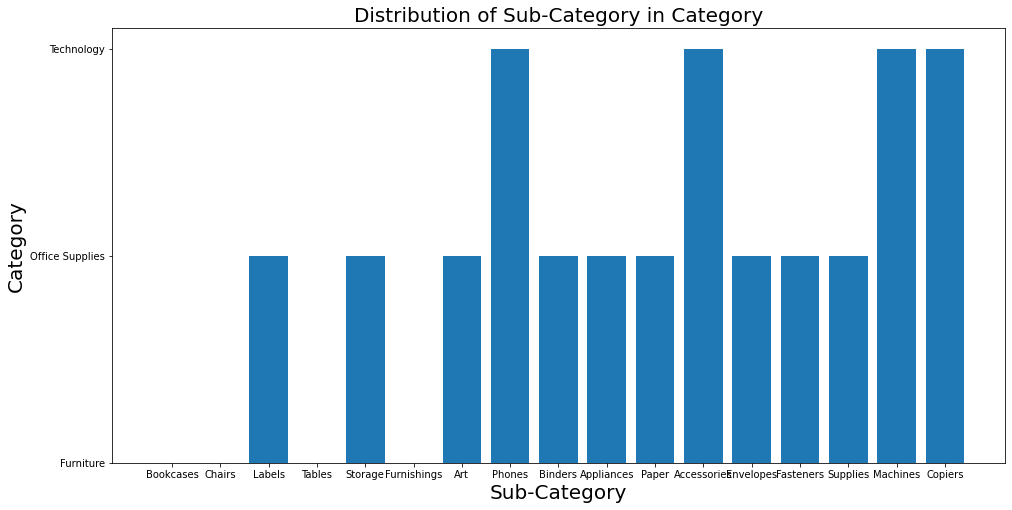

In [16]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=Df)
plt.ylabel('Category', size = 20)
plt.xlabel('Sub-Category', size = 20)
plt.title('Distribution of Sub-Category in Category', size = 20)
plt.show()

Now, I want to see how Sub-Categories distributed by percentage

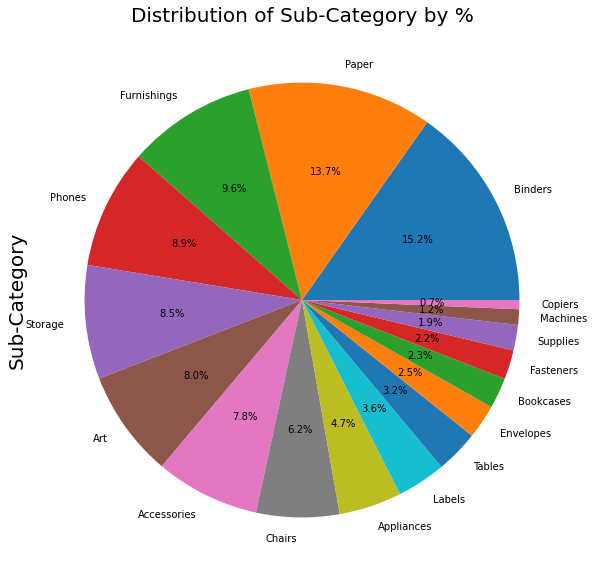

In [17]:
plt.figure(figsize=(12,10))
Df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel('Sub-Category', size = 20)
plt.title('Distribution of Sub-Category by %', size = 20)
plt.show()

As we can see from the pie chart above, there is wide variety of Office Supplies especially in Binders and Paper department.

Lets look at the how sales and profit differs between Sub-Categories.

<Figure size 720x1440 with 0 Axes>

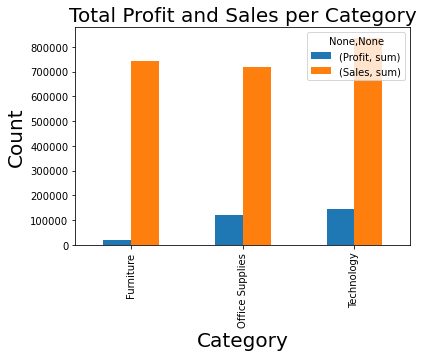

In [18]:
plt.figure(figsize= (10,20))
Df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Count', size = 20)
plt.xlabel('Category', size = 20)
plt.title('Total Profit and Sales per Category', size = 20)
plt.show()

<Figure size 720x1440 with 0 Axes>

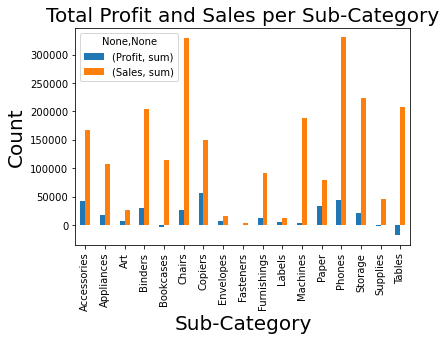

In [19]:
plt.figure(figsize= (10,20))
Df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Count', size = 20)
plt.xlabel('Sub-Category', size = 20)
plt.title('Total Profit and Sales per Sub-Category', size = 20)
plt.show()

As we can see from the chart above highest profit is coming from Copiers followed by Accessories and phones.  Phones and Chairs are having the Highest selling price. 


# 2.Product 

I want to do product based anaylisis to see which product is selling more.

In [20]:
#Check on number of products available in store in total
Df['Product Name'].nunique()

1850

In [21]:
Df['Product Name'].value_counts()

Staple envelope                                                            48
Staples                                                                    46
Easy-staple paper                                                          46
Avery Non-Stick Binders                                                    20
Staples in misc. colors                                                    19
                                                                           ..
Hewlett-Packard Deskjet 5550 Printer                                        1
PNY Rapid USB Car Charger - Black                                           1
Jiffy Padded Mailers with Self-Seal Closure                                 1
Sanitaire Vibra Groomer IR Commercial Upright Vacuum, Replacement Belts     1
Boston 1900 Electric Pencil Sharpener                                       1
Name: Product Name, Length: 1850, dtype: int64

Since I am not able to see all the products and the number of the products clearly from the value_counts, I want to see the top 10 products.

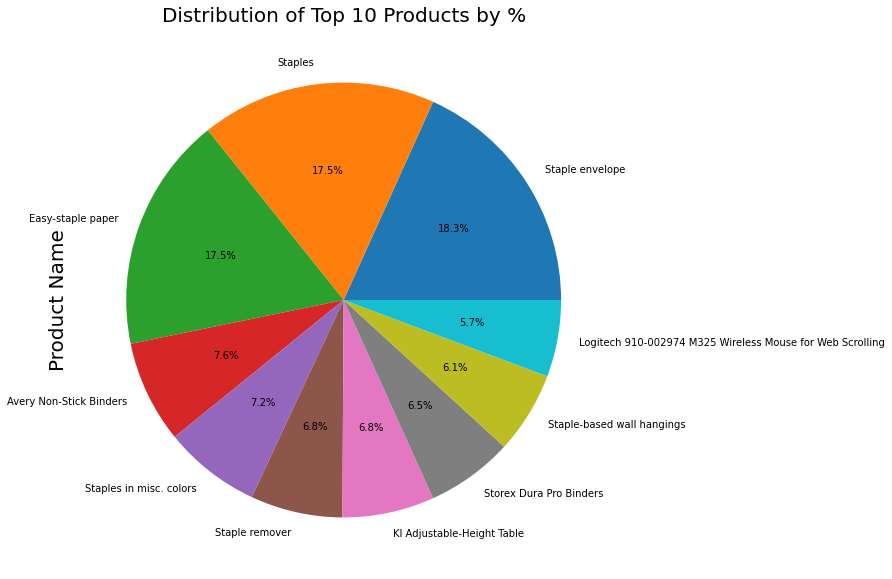

In [22]:
plt.figure(figsize=(12,10))
Df['Product Name'].value_counts().head(10).plot.pie(autopct="%1.1f%%")
plt.ylabel('Product Name', size = 20)
plt.title('Distribution of Top 10 Products by %', size = 20)
plt.show()

# 3.Customer

First of all i want to see how many customers do i have. 

In [23]:
Df['Customer ID'].nunique()

793

Now I want to see the top 10 buying customers and where do they order from.

In [24]:
#Top 10 customers who order frequently
Df_top10=Df['Customer Name'].value_counts().head(10)
Df_top10

William Brown          37
Matt Abelman           34
Paul Prost             34
John Lee               34
Jonathan Doherty       32
Chloris Kastensmidt    32
Edward Hooks           32
Seth Vernon            32
Arthur Prichep         31
Emily Phan             31
Name: Customer Name, dtype: int64

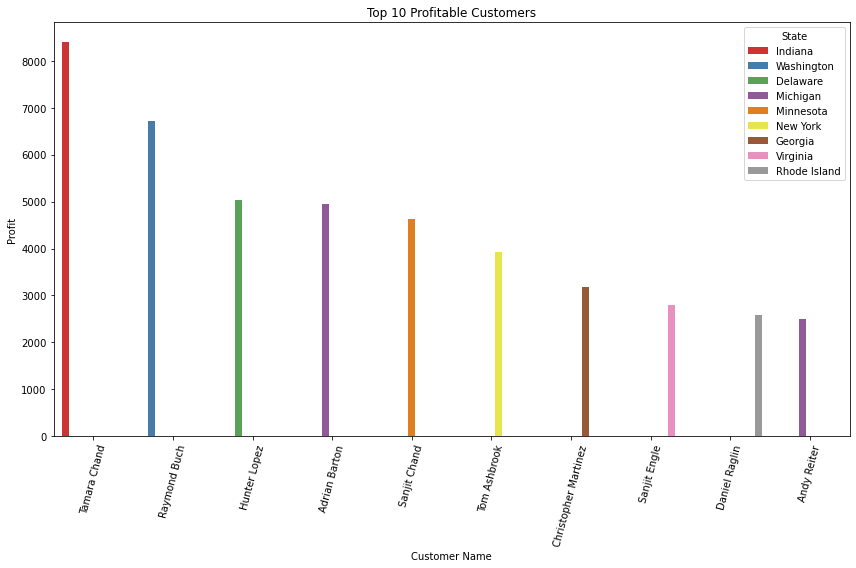

In [25]:
#Top 10 Customers by the profit
Top10_customer = Df.sort_values(['Profit'], ascending=False).head(10)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Customer Name', y='Profit',hue='State',palette='Set1', data=Top10_customer, ax=ax)
ax.set_title("Top 10 Profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

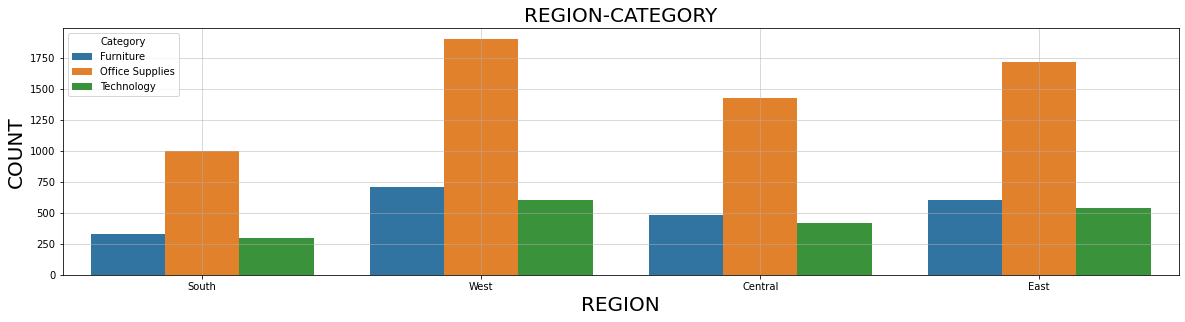

In [26]:
#Ploting based upon the REGION and the category based.
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.countplot('Region',hue='Category',data=Df)
plt.title('REGION-CATEGORY', size=20)
plt.ylabel('COUNT', size=20)
plt.xlabel('REGION',size=20)
plt.grid(alpha=0.6)
plt.show()



As we can see the higer number of buyers with respect to category are from West and East regions.

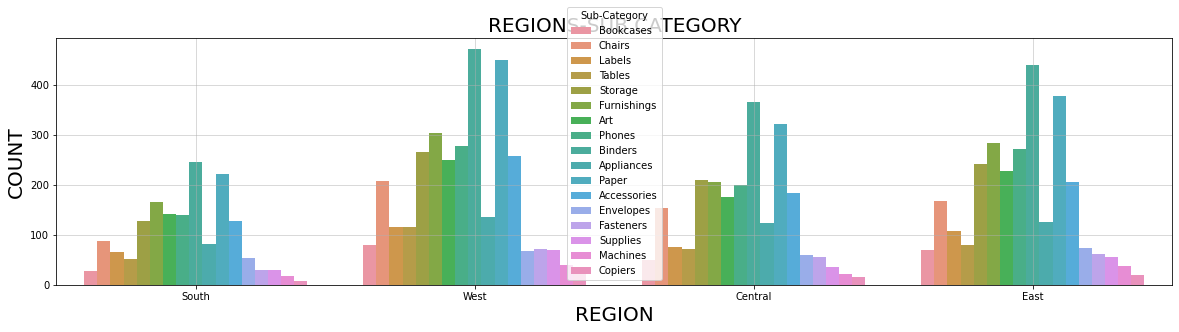

In [27]:
#Ploting based upon the REGION and the Sub-category based.

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.countplot('Region',hue='Sub-Category',data=Df)
plt.title('REGIONS-SUB CATEGORY', size=20)
plt.ylabel('COUNT',size=20)
plt.xlabel('REGION',size=20)
plt.grid(alpha=0.6)
plt.show()

As we can see the higer number of buyers with respect to sub-category are from West and East regions.

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

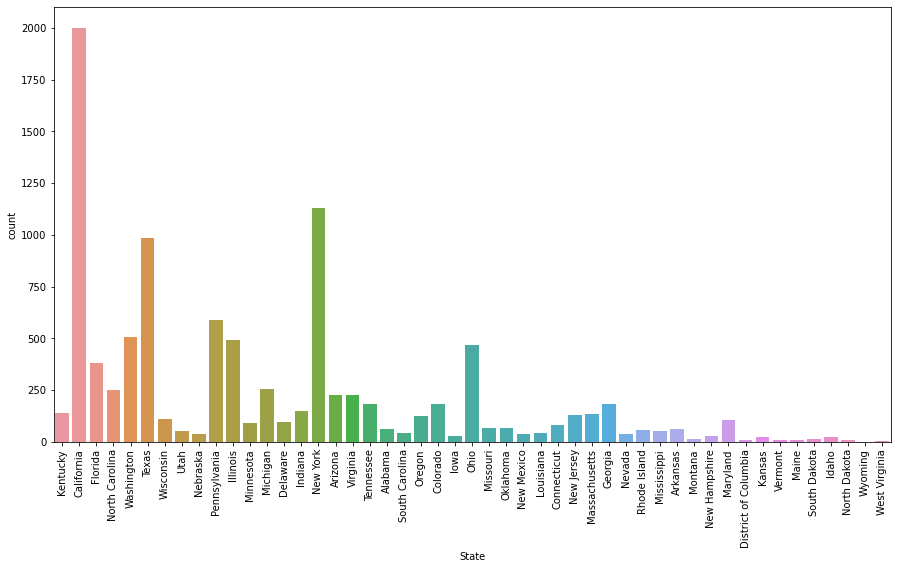

In [28]:
#Ploting based upon the State. 
print(Df['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=Df['State'])
plt.xticks(rotation=90)
plt.show()

As we can see the higer number of buyers are from New York and California states.

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


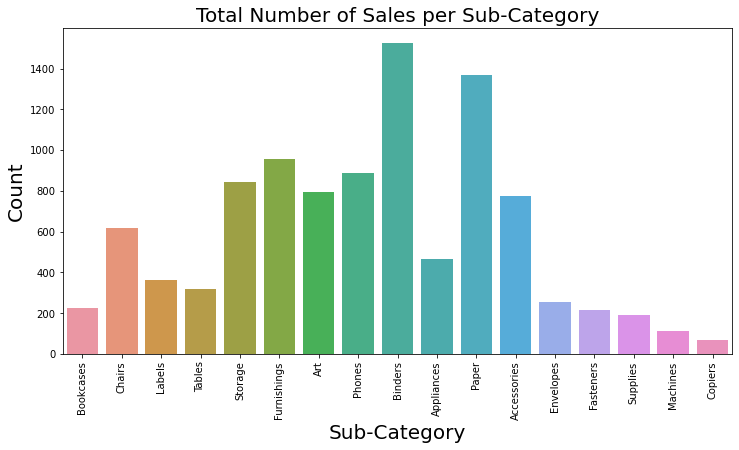

In [29]:
#Ploting based upon the Sub-Category.
print(Df['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=Df['Sub-Category'])
plt.ylabel('Count', size = 20)
plt.xlabel('Sub-Category', size = 20)
plt.title('Total Number of Sales per Sub-Category', size = 20)
plt.xticks(rotation=90)
plt.show()

Even if the highest profit is coming from Copiers followed by Accessories and phones, and Phones and Chairs are having the Highest selling price, Highest number of sales are from Binders and Paper.

In [30]:
# top selling products by state 
Df.columns


Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [35]:
sale_Products_state = Df.groupby(["Product Name","State"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False).head(10)
sale_Products_state


,Product Name,State,Quantity
6592,Staple envelope,New York,44
6659,Staples,Texas,39
2542,Eldon Shelf Savers Cubes and Bins,California,29
112,4009 Highlighters by Sanford,California,27
7228,Wilson Jones Clip & Carry Folder Binder Tool f...,California,26
2319,"Dual Level, Single-Width Filing Carts",New York,26
6599,Staple holder,California,25
2902,"File Shuttle II and Handi-File, Black",California,25
7598,Xerox 1919,California,25
4392,"Lesro Sheffield Collection Coffee Table, End T...",California,25


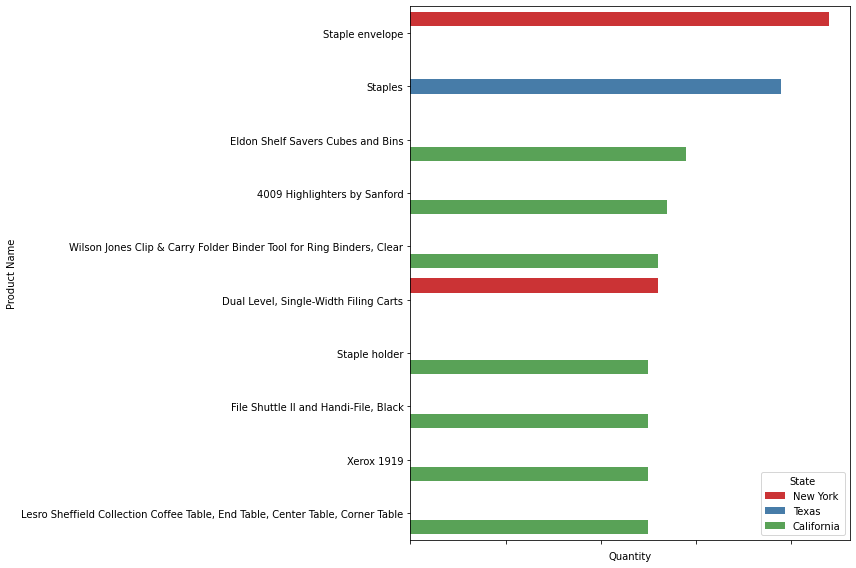

In [36]:

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Quantity', y='Product Name',hue='State',palette='Set1', data=sale_Products_state, ax=ax)
#ax.set_title("Top 10 Profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

In [38]:
sale_Products_Sub_Category = Df.groupby(["Sub-Category","State"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False).head(10)
sale_Products_Sub_Category

,Sub-Category,State,Quantity
452,Paper,California,1091
130,Binders,California,1057
344,Furnishings,California,751
157,Binders,New York,696
498,Phones,California,691
87,Art,California,644
542,Storage,California,637
168,Binders,Texas,626
488,Paper,Texas,572
3,Accessories,California,568


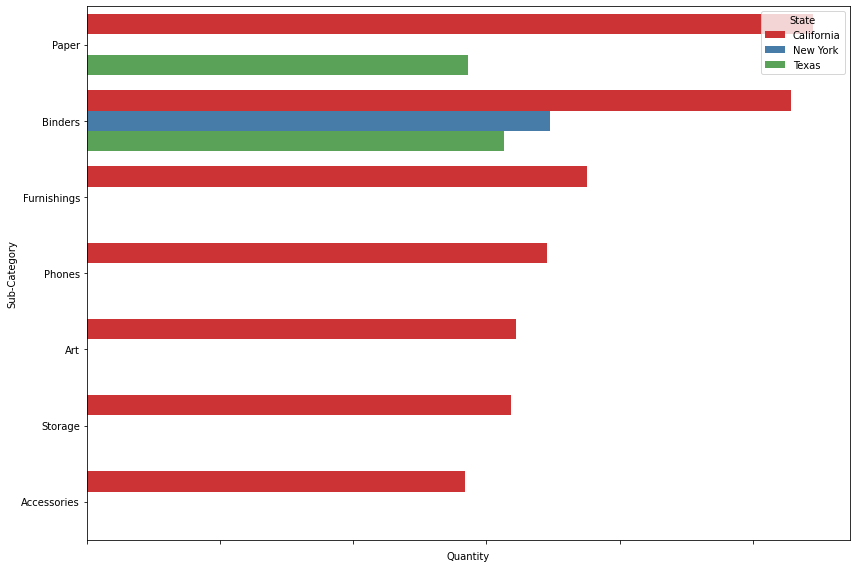

In [40]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Quantity', y='Sub-Category',hue='State',palette='Set1', data=sale_Products_Sub_Category, ax=ax)
#ax.set_title("Top 10 Profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

# 5.Delivery Time

I want to see the impact of the delivery time on number of sales, profit and selling price with respect to category, sub_category, state and region to see if the delivery tine is correlated with the profit.

In [41]:
Df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [43]:
Df["Order Date"] = pd.to_datetime(Df["Order Date"])
Df["Ship Date"] = pd.to_datetime(Df["Ship Date"])
Df['Year'] = Df["Order Date"].dt.year
Df['Month'] = Df['Order Date'].values.astype('datetime64[M]')
Df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,2016-11-01
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,2016-11-01
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,2016-06-01
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,2015-10-01
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,2015-10-01


In [58]:
prep = (Df['Order Date']-Df['Ship Date'])
prep

0      -3 days
1      -3 days
2      -4 days
3      -7 days
4      -7 days
         ...  
9989   -2 days
9990   -5 days
9991   -5 days
9992   -5 days
9993   -5 days
Length: 9994, dtype: timedelta64[ns]

In [46]:
prep_time = Df.groupby(["Order Date","Ship Date", "State"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False).head(10)
prep_time

,Order Date,Ship Date,State,Quantity
4161,2017-09-20,2017-09-26,New York,52
4675,2017-12-08,2017-12-12,California,47
2686,2016-09-13,2016-09-18,Nebraska,46
666,2014-10-31,2014-11-04,California,45
3390,2017-03-17,2017-03-22,New York,43
3117,2016-12-11,2016-12-11,California,43
2931,2016-11-10,2016-11-14,Ohio,42
1323,2015-07-09,2015-07-14,Maryland,41
3091,2016-12-06,2016-12-10,California,41
2013,2016-02-05,2016-02-05,Georgia,41
